In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial import distance_matrix 
from sklearn.cluster import DBSCAN 
from sklearn.manifold import TSNE
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/sample_data/DS3_C6_S3_Clustering_AbsenteeismAtWork_Data_Project.csv",sep=';', index_col="ID")
df.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,,,,,,,,,,,,,,,,,,,,
11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [5]:
df.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 11 to 35
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reason for absence               740 non-null    int64  
 1   Month of absence                 740 non-null    int64  
 2   Day of the week                  740 non-null    int64  
 3   Seasons                          740 non-null    int64  
 4   Transportation expense           740 non-null    int64  
 5   Distance from Residence to Work  740 non-null    int64  
 6   Service time                     740 non-null    int64  
 7   Age                              740 non-null    int64  
 8   Work load Average/day            740 non-null    float64
 9   Hit target                       740 non-null    int64  
 10  Disciplinary failure             740 non-null    int64  
 11  Education                        740 non-null    int64  
 12  Son                   

In [7]:
df.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [8]:
# divide columns to numerical and categorical ones
categorical= ['Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']
numerical= df.drop(columns=categorical).columns.to_list()
data[categorical].nunique()

NameError: ignored

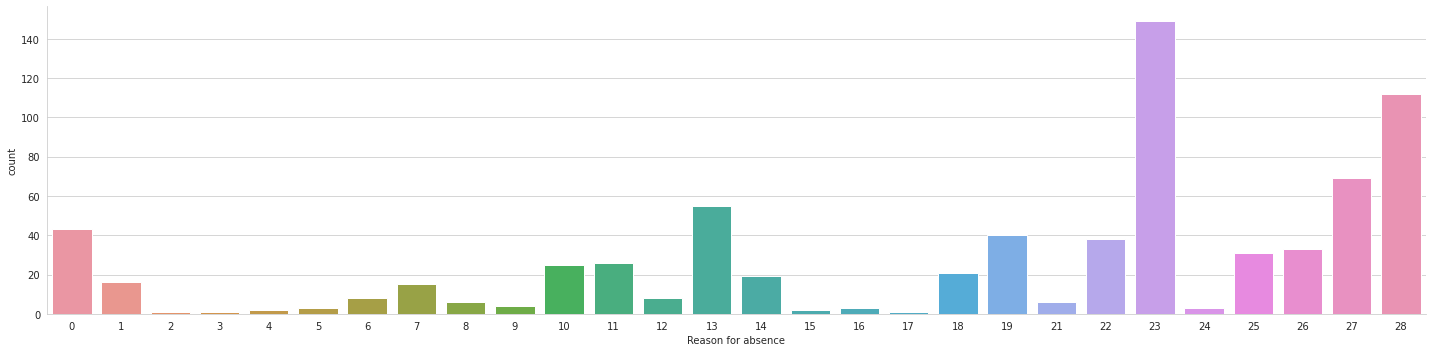

In [9]:
sns.set_style("whitegrid")
sns.catplot(data=df, x='Reason for absence', kind= 'count',aspect=4);

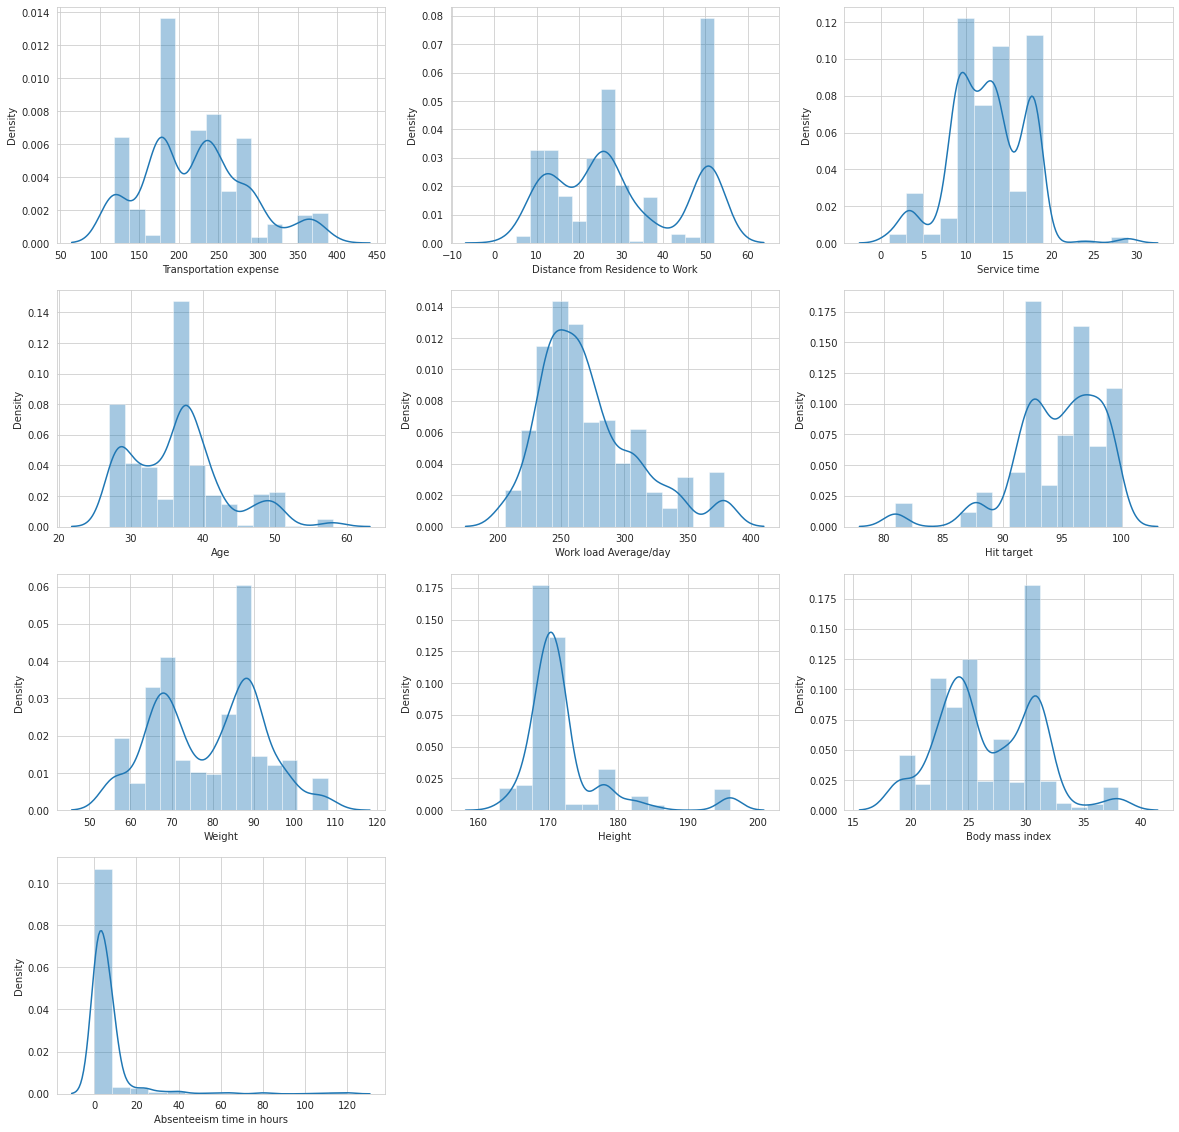

In [10]:
# plot distribution of numerical attributes
num_df = df[numerical]
plt.figure(figsize=(20,20))
for i in range(1, 11):
    plt.subplot(4, 3, i)
    sns.distplot(num_df[num_df.columns[i-1]],bins=14)

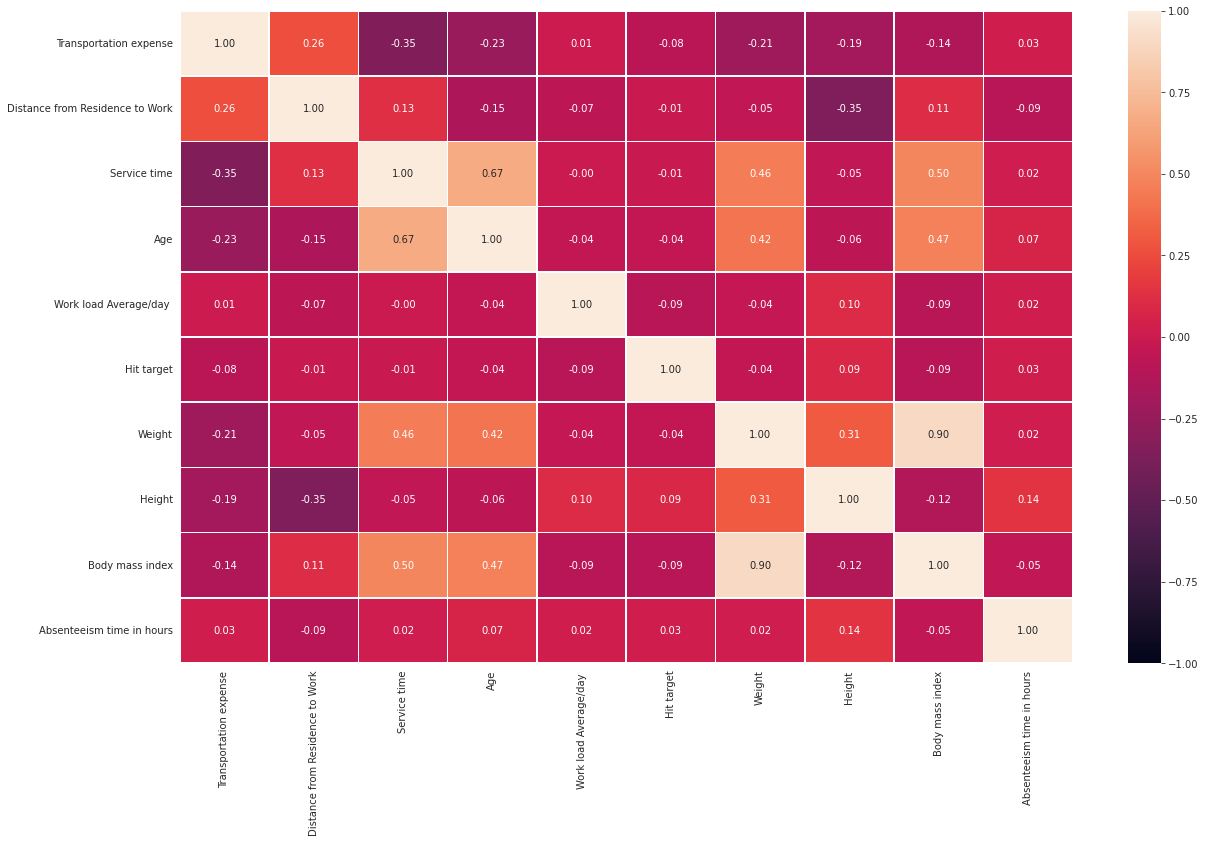

In [11]:
# correlation
num_corr = num_df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(num_corr, annot=True, fmt=".2f",vmin=-1, vmax=1, linewidths=.5)
plt.yticks(rotation=0)
plt.show()

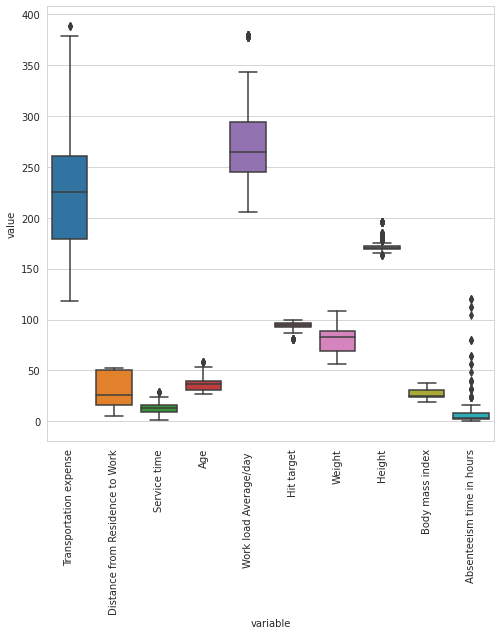

In [12]:
# display boxlots
plt.figure(figsize=(8,8))
sns.boxplot(x="variable", y="value", data=pd.melt(num_df))
plt.xticks(rotation=90)
plt.show()

In [16]:
# Check for outliers using boxplots and drop them
for num_att in numerical:
    Q3, Q1 = np.percentile(df[num_att], [75,25])
    MEAN = df[num_att].mean()
    IQR = Q3 - Q1
    minimum = Q1 - (IQR*1.5)
    maximum = Q3 + (IQR*1.5)
    data_clean=df.drop(df.loc[df[num_att]< minimum,num_att].index) 
    data_clean=df.drop(df.loc[df[num_att]> maximum,num_att].index)

In [17]:
# size reduced to 150 from 740
len(data_clean)

150

# NORMALIZATION

In [18]:
mms = MinMaxScaler()
numerical = [x for x in numerical if x not in ['Absenteeism time in hours']]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', mms, numerical),
        ('cat', 'passthrough', categorical)
    ], remainder='passthrough')
data_pp = preprocessor.fit_transform(data_clean)

In [19]:
# SPLITTING THE DATA
y = data_pp[:,-1].reshape(-1, 1)
Y = np.round(MinMaxScaler((0,2)).fit_transform(y)).ravel()
X = np.delete(data_pp,-1,1)

In [20]:
cv=ShuffleSplit(n_splits=10, random_state = 42)

In [21]:
rf = RandomForestClassifier(random_state = 0,max_features=None,n_jobs=-1)

In [22]:
param = {"n_estimators":[1000]}

In [23]:
# grid search for parameters
grid = GridSearchCV(estimator=rf, param_grid=param, cv=cv, n_jobs=-1)
grid.fit(X,Y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=None),
             estimator=RandomForestClassifier(max_features=None, n_jobs=-1,
                                              random_state=0),
             n_jobs=-1, param_grid={'n_estimators': [1000]})

In [24]:
print("The best parameters are %s with a score of %0.4f"% (grid.best_params_, grid.best_score_))

The best parameters are {'n_estimators': 1000} with a score of 0.7133


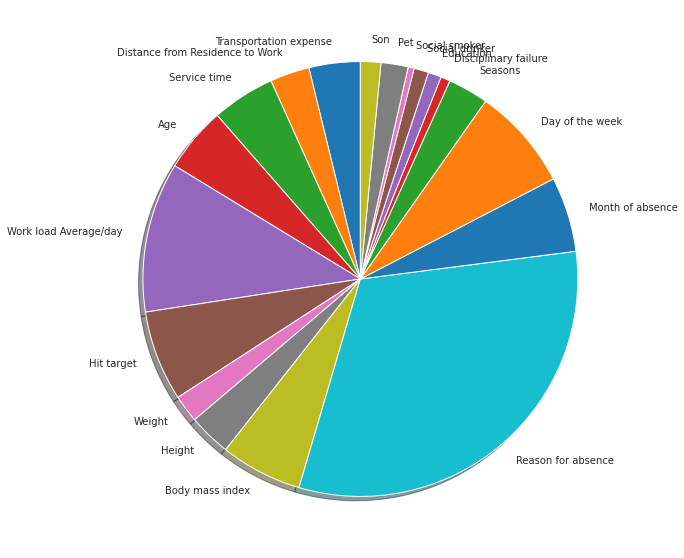

In [25]:
atts = numerical+categorical
plt.figure(figsize=(10,10))
plt.pie(grid.best_estimator_.feature_importances_, labels=atts, shadow=True, startangle=90);

# CLUSTERING

In [26]:
selected_atts = ['Reason for absence', 'Day of the week', 'Work load Average/day','Body mass index','Hit target', 
                     'Seasons', 'Month of absence', 'Transportation expense', 'Age']

selected_atts_idx=np.where(np.isin(atts,selected_atts))[0]
X_selected = X[:,selected_atts_idx]

Text(0, 0.5, 'Inertia')

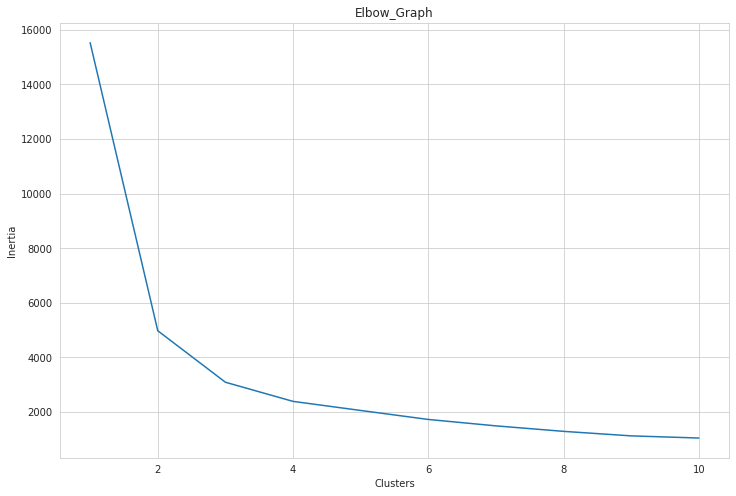

In [28]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X_selected)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Elbow_Graph')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [38]:
# 2 clusters
km2 = KMeans(n_clusters=2).fit(X_selected)

# plot using tsne 
X_embedded  = TSNE(n_components=3, perplexity=10, random_state=24).fit_transform( X_selected )
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[km2.labels_])
fig.show()

In [39]:
# 3 clusters
km3 = KMeans(n_clusters=3).fit(X_selected)

# plot using tsne 
X_embedded  = TSNE(n_components=3, perplexity=10,random_state=24).fit_transform( X_selected )

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[km3.labels_])
fig.show()

In [40]:
# 4 clusters
km4 = KMeans(n_clusters=4).fit(X_selected)

# plot using tsne 
X_embedded  = TSNE(n_components=3, perplexity=10,random_state=24).fit_transform( X_selected )

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[km4.labels_])
fig.show()

In [41]:
# PCA for reducing dimensions to 3
pca = PCA(n_components=3)
pca_results = pca.fit_transform(X_selected)

In [42]:
# running k-means on resuts of pca
km_pca = KMeans(n_clusters=3).fit(pca_results)
fig = px.scatter_3d(x=pca_results [:,0],y=pca_results [:,1],z=pca_results [:,2],color=colors[km_pca.labels_])
fig.show()

In [44]:
# define a function to plot silhouette values of clusters
def silhouette_plot(X, y, n_clusters, ax=None):
    if ax is None:
        ax = plt.gca()

    # Compute the silhouette scores for each sample
    silhouette_avg = silhouette_score(X, y)
    sample_silhouette_values = silhouette_samples(X, y)

    y_lower = padding = 2
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        ith_cluster_silhouette_values = sample_silhouette_values[y == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0,
                         ith_cluster_silhouette_values,
                         facecolor=color,
                         edgecolor=color,
                         alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))

        # Compute the new y_lower for next plot
        y_lower = y_upper + padding

    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax.axvline(x=silhouette_avg, c='r', alpha=0.8, lw=0.8, ls='-')
    ax.annotate('Average',
                xytext=(silhouette_avg, y_lower * 1.025),
                xy=(0, 0),
                ha='center',
                alpha=0.8,
                c='r')

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_ylim(0, y_upper + 1)
    ax.set_xlim(-0.075, 1.0)
    return ax


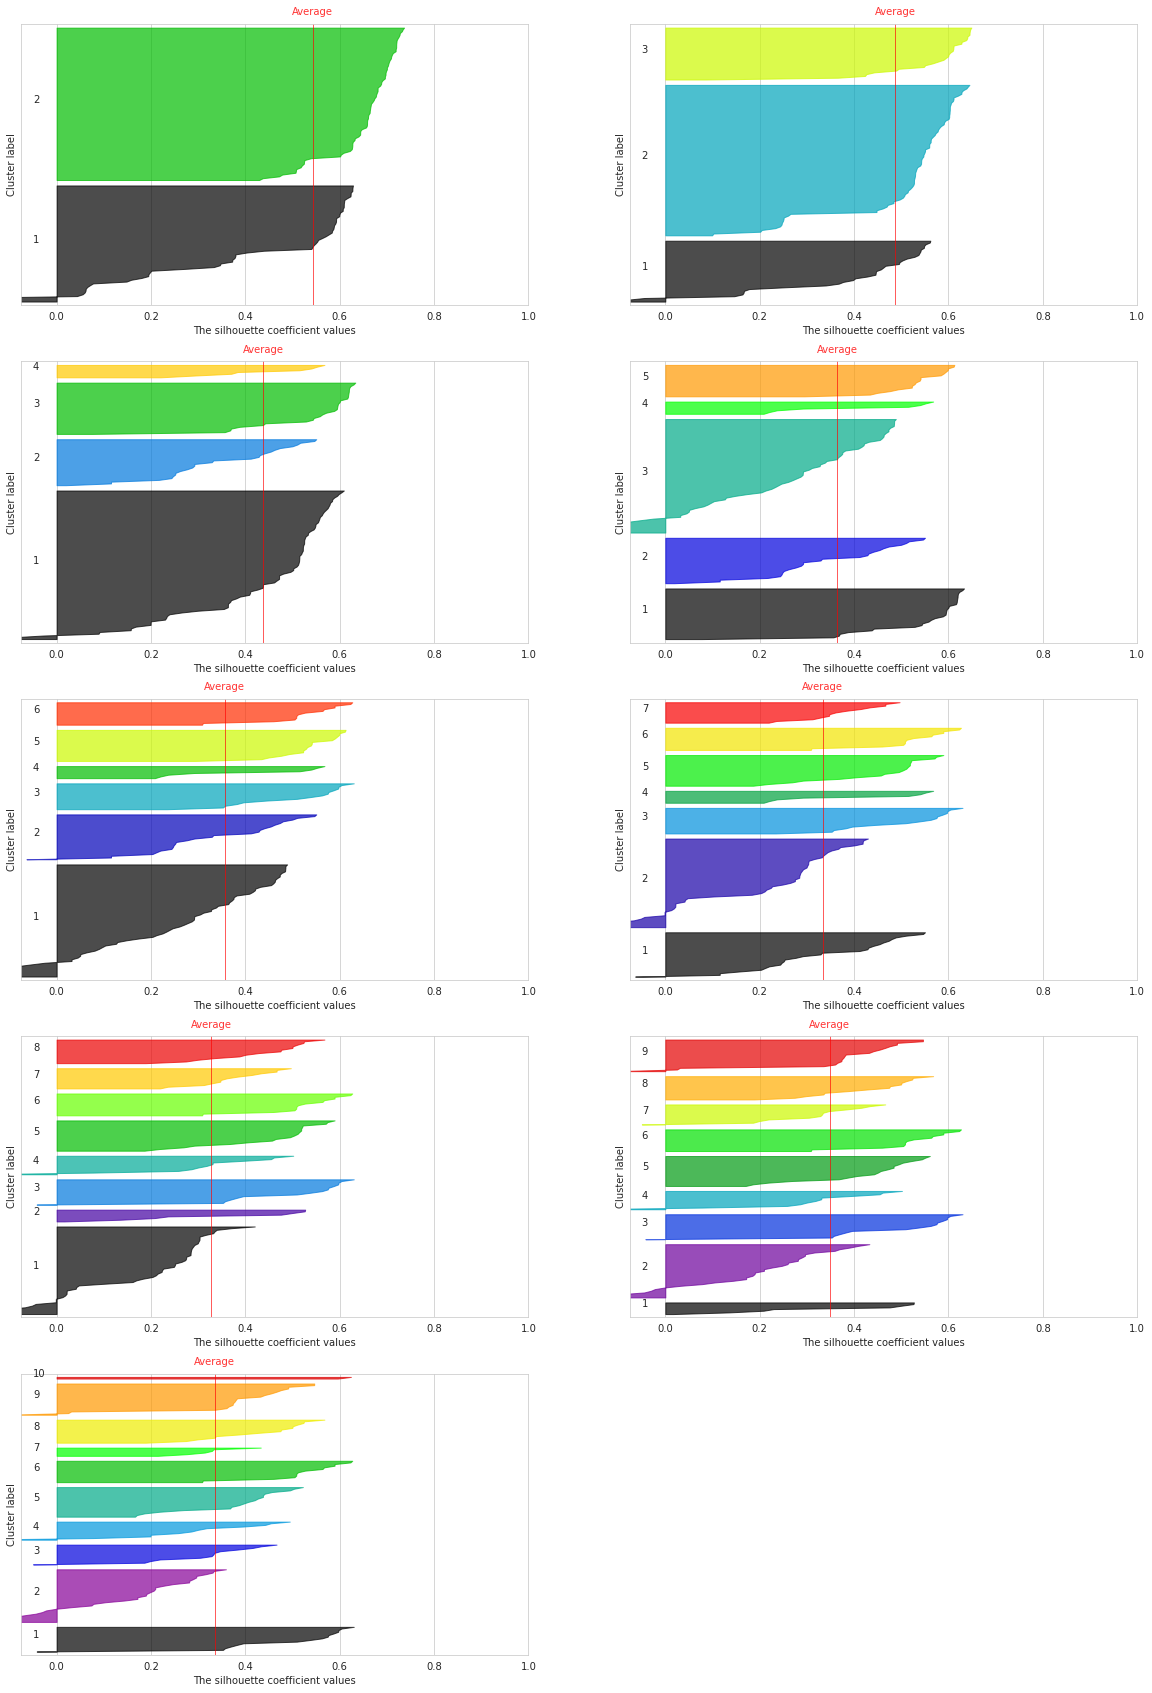

In [46]:
# plot silhouette coefficients
import matplotlib.cm as cm
plt.figure(figsize=(20,30))
for i in range(2,11):  
    agnes = AgglomerativeClustering(n_clusters=i, linkage='average')
    agnes_labels = agnes.fit_predict(X_selected)
    plt.subplot(5,2,i-1)
    silhouette_plot(X_selected,agnes_labels,i)

In [47]:
# 6 clusters
agnes6 = AgglomerativeClustering(n_clusters=6, linkage='average').fit(X_selected)

# plot using tsne 
X_embedded  = TSNE(n_components=3, perplexity=10,random_state=24).fit_transform( X_selected )

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[agnes6.labels_])
fig.show()

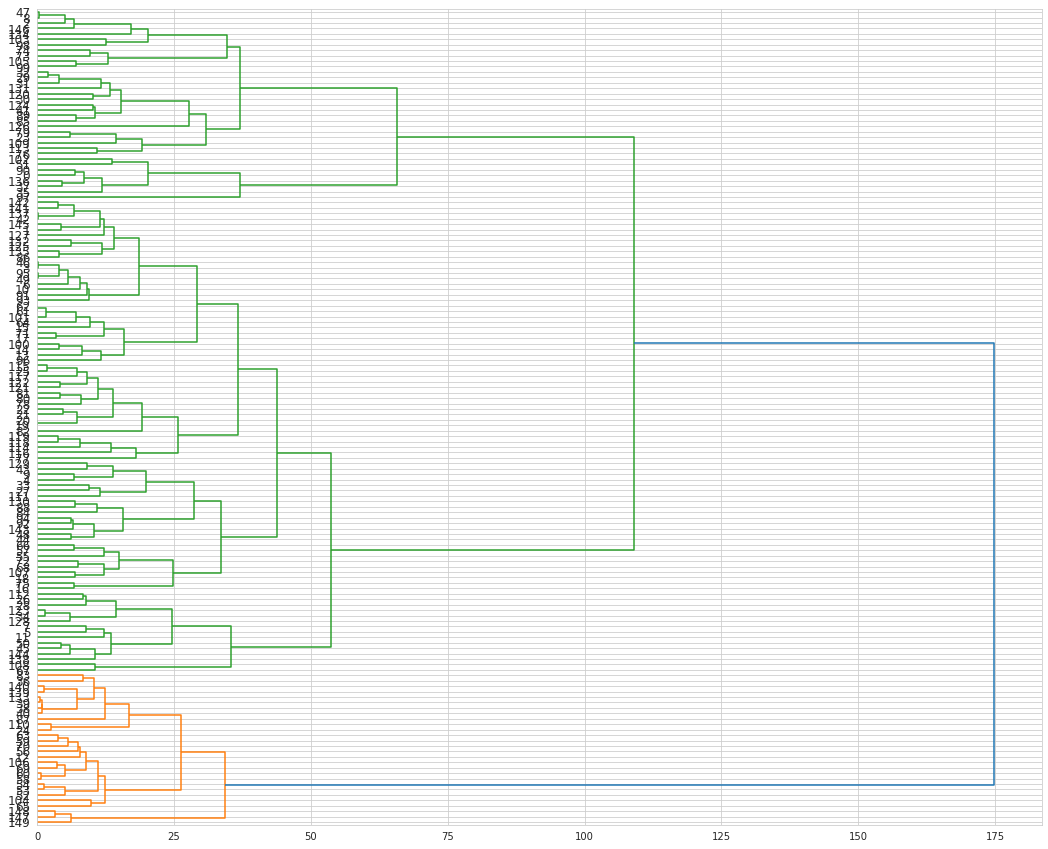

In [49]:
# there's no inertia in attribute of AgglomerativeClustering class so we use scipy's distance matrix
from scipy.cluster import hierarchy
dist = distance_matrix(X_selected, X_selected)

# dendrogram
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 15))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

In [50]:
# search for best parameters by using silhouette_score
score_list=[]
for eps in np.arange(0.5,20,0.5):
    for min_samples in range(3,20):
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_selected)
        labels = db.labels_
        n = len(np.unique(labels))
        if n>1:
            score=silhouette_score(X_selected, labels)
            score_list.append((score,(eps,min_samples)))
     
biggest_score = sorted(score_list)[-1]  
best_eps, best_min_spamles = biggest_score[1]
best_eps, best_min_spamles

(5.0, 11)

In [51]:
# best model for DBSCAN
db_best = DBSCAN(eps=best_eps, min_samples=best_min_spamles).fit(X_selected)

# plot using tsne 
X_embedded  = TSNE(n_components=3, perplexity=10,random_state=24).fit_transform( X_selected )

fig = px.scatter_3d(x=X_embedded [:,0],y=X_embedded [:,1],z=X_embedded [:,2],color=colors[db_best.labels_])
fig.show()

# EVALUATION
- We will compare best of 3 models by using 8 metrics:

- Estimated number of clusters
- Estimated number of noise points
- Homogeneity: For perfect clustering, each cluster contains only members of a single class.
- Completeness: For perfect clustering, all members of a given class are assigned to the same cluster.
- V-measure: Harmonic mean of Homogeneity and Completeness.
- Adjusted Rand Index: Given the knowledge of the ground truth class, the adjusted Rand index is a function that measures the similarity of the two assignments, ignoring permutations and with chance normalization:
- Adjusted Mutual Information: Given the knowledge of the ground truth class, the Mutual Information is a function that measures the agreement of the two assignments, ignoring permutations.
- Fowlkes-Mallows score: Geometric mean of precision and recall.
- Silhouette Coefficient: If the ground truth labels are not known, the - - - - - Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample by (b - a) / max(a, b)